In [154]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
words = open('names.txt', 'r').read().splitlines()

In [156]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [157]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [158]:
block_size = 3
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [159]:
C = torch.randn((27, 2))

In [160]:
C

tensor([[-0.8695, -0.4781],
        [ 0.1533, -0.8264],
        [-1.4478, -1.4719],
        [-0.0894, -0.2692],
        [ 0.0195,  0.5787],
        [ 0.4331,  1.8670],
        [-1.0524, -0.0306],
        [-0.3356, -0.9247],
        [-0.0302, -1.0331],
        [-0.5976, -0.4903],
        [-1.5098, -0.0925],
        [-0.7157, -2.4195],
        [ 1.4180, -0.9265],
        [ 0.0990,  0.5509],
        [-0.0442, -2.2368],
        [ 0.9584, -0.0829],
        [ 1.3670,  0.7122],
        [-1.0549,  1.7312],
        [ 0.8744, -0.0313],
        [ 0.3631, -1.1534],
        [ 1.5916, -0.0487],
        [ 1.7257,  0.2314],
        [ 0.5104,  0.3556],
        [-0.2702, -1.1662],
        [-0.3060, -1.5379],
        [-0.5652, -0.3107],
        [-1.2918,  0.2652]])

In [161]:
 X.shape

torch.Size([32, 3])

In [162]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [163]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [164]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [165]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [166]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [167]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [168]:
h

tensor([[-0.9904,  0.9874, -0.9856,  ...,  0.9940,  0.9847, -0.9999],
        [ 0.2492,  0.9833, -0.9708,  ...,  0.9992,  0.9993,  0.0042],
        [-0.9526,  0.5532,  0.3072,  ...,  1.0000,  0.2977,  0.9651],
        ...,
        [-0.9993, -0.9991,  0.9839,  ..., -0.4346, -0.9110,  0.7592],
        [-0.9812, -0.9323,  0.9418,  ..., -0.9993, -0.2633, -0.9968],
        [-0.9900,  0.6911, -0.9585,  ...,  0.3497,  0.9642, -0.9921]])

In [169]:
h.shape

torch.Size([32, 100])

In [170]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [171]:
logits = h @ W2 + b2

In [172]:
logits.shape

torch.Size([32, 27])

In [173]:
counts = logits.exp()

In [174]:
counts

tensor([[1.4229e+01, 1.6845e-10, 2.0910e+02, 7.5103e+02, 2.1202e-07, 1.2978e+04,
         4.2028e+04, 9.6777e-02, 3.0435e+01, 9.4632e-04, 1.0111e-02, 3.1729e-03,
         4.1149e+01, 4.9264e-03, 6.9353e-04, 1.7178e+05, 7.1128e-04, 3.0922e-01,
         5.0182e+02, 5.9501e-02, 9.3213e-05, 1.2688e+03, 1.0558e+03, 4.6183e-03,
         2.7406e+01, 1.2940e+03, 2.1444e+03],
        [1.1349e-01, 5.7137e-04, 8.6722e+04, 5.1525e+00, 5.0714e+00, 7.6400e-01,
         7.9461e+05, 2.3311e+07, 6.5976e+01, 1.4141e-01, 4.5192e-01, 9.6502e-02,
         1.8569e+04, 3.5219e-04, 4.8179e-02, 1.5079e+06, 4.0315e-02, 6.8696e+00,
         5.9579e-04, 9.1127e-03, 6.2019e+01, 5.1491e-01, 8.0214e+01, 4.7661e+00,
         6.8806e+03, 5.7947e+03, 3.0654e-06],
        [8.6908e-04, 1.1463e-05, 2.3731e+06, 1.1134e+00, 1.0847e+02, 2.2413e-05,
         3.0873e+01, 6.2302e+06, 3.7481e+00, 2.3739e+01, 3.5016e+00, 1.9327e-02,
         1.2460e+06, 1.1685e+00, 1.6340e-06, 5.5410e+01, 6.0581e+02, 2.0086e-02,
         1.2395e-

In [175]:
probs = counts / counts.sum(1, keepdims=True)

In [176]:
probs.shape

torch.Size([32, 27])

In [177]:
probs

tensor([[6.0773e-05, 7.1946e-16, 8.9310e-04, 3.2078e-03, 9.0557e-13, 5.5431e-02,
         1.7951e-01, 4.1335e-07, 1.2999e-04, 4.0419e-09, 4.3187e-08, 1.3552e-08,
         1.7575e-04, 2.1042e-08, 2.9622e-09, 7.3371e-01, 3.0380e-09, 1.3207e-06,
         2.1433e-03, 2.5414e-07, 3.9813e-10, 5.4195e-03, 4.5094e-03, 1.9726e-08,
         1.1706e-04, 5.5269e-03, 9.1590e-03],
        [4.4106e-09, 2.2205e-11, 3.3702e-03, 2.0024e-07, 1.9709e-07, 2.9691e-08,
         3.0880e-02, 9.0593e-01, 2.5640e-06, 5.4953e-09, 1.7563e-08, 3.7503e-09,
         7.2162e-04, 1.3687e-11, 1.8723e-09, 5.8599e-02, 1.5667e-09, 2.6697e-07,
         2.3154e-11, 3.5414e-10, 2.4102e-06, 2.0010e-08, 3.1173e-06, 1.8522e-07,
         2.6740e-04, 2.2520e-04, 1.1913e-13],
        [8.8139e-11, 1.1625e-12, 2.4067e-01, 1.1292e-07, 1.1000e-05, 2.2731e-12,
         3.1311e-06, 6.3185e-01, 3.8012e-07, 2.4075e-06, 3.5512e-07, 1.9601e-09,
         1.2636e-01, 1.1850e-07, 1.6572e-13, 5.6195e-06, 6.1439e-05, 2.0371e-09,
         1.2570e-

In [178]:
probs[torch.arange(32), Y]

tensor([5.5431e-02, 1.3687e-11, 1.1850e-07, 9.4098e-08, 7.4091e-07, 7.3371e-01,
        5.0265e-05, 3.5649e-16, 6.6196e-05, 3.0395e-06, 1.1091e-16, 6.3666e-01,
        7.1946e-16, 3.3004e-04, 7.5437e-21, 2.7016e-03, 4.0419e-09, 8.3317e-07,
        2.0588e-14, 2.6707e-15, 8.2980e-01, 6.8692e-05, 5.0865e-05, 1.3922e-13,
        7.7112e-03, 2.5414e-07, 8.7989e-01, 5.0543e-14, 8.3049e-09, 2.1113e-05,
        6.9291e-09, 7.1244e-03])

In [179]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [180]:
Y.shape

torch.Size([32])

In [ ]:
loss = -probs[torch.arange(32), Y].log().mean()

In [ ]:
loss

In [ ]:
device = torch.device('cuda:0')
torch.set_default_device(device)

In [ ]:
block_size = 3
X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.device

In [ ]:
X.shape, Y.shape

In [ ]:
g = torch.Generator(device='cuda').manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters)

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

In [ ]:
lri = []
lossi = []

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # backward pass
    for p in parameters: 
        p.grad = None
    loss.backward()

    # lr = lrs[i].item()
    for p in parameters:
        p.data += -0.01 * p.grad

    # lri.append(lr)
    # lossi.append(loss.item())

print(loss.item())

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

In [ ]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [ ]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(50000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters: 
        p.grad = None
    loss.backward()

    # lr = lrs[i].item()
    for p in parameters:
        p.data += -0.1 * p.grad

    # lri.append(lr)
    lossi.append(loss.log10().item())
    stepi.append(i)


print(loss.item())

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].cpu().data, C[:,1].cpu().data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
C[:,0].cpu()

In [ ]:
g = torch.Generator(device=device).manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

In [182]:
loss

tensor(16.4416)

In [211]:
device = torch.device('cuda:0')
torch.set_default_device(device)

In [212]:
block_size = 3
X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [213]:
X.device

device(type='cuda', index=0)

In [214]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [313]:
g = torch.Generator(device='cuda').manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [314]:
sum(p.nelement() for p in parameters)

11897

In [315]:
for p in parameters:
    p.requires_grad = True

In [277]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [283]:
lri = []
lossi = []

for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # backward pass
    for p in parameters: 
        p.grad = None
    loss.backward()

    # lr = lrs[i].item()
    for p in parameters:
        p.data += -0.01 * p.grad

    # lri.append(lr)
    # lossi.append(loss.item())

print(loss.item())

2.752275228500366


In [284]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3352, device='cuda:0', grad_fn=<NllLossBackward0>)

In [316]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [317]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [318]:
lri = []
lossi = []
stepi = []

In [319]:
for i in range(50000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    
    # backward pass
    for p in parameters: 
        p.grad = None
    loss.backward()

    # lr = lrs[i].item()
    for p in parameters:
        p.data += -0.1 * p.grad

    # lri.append(lr)
    lossi.append(loss.log10().item())
    stepi.append(i)


print(loss.item())

2.2185778617858887


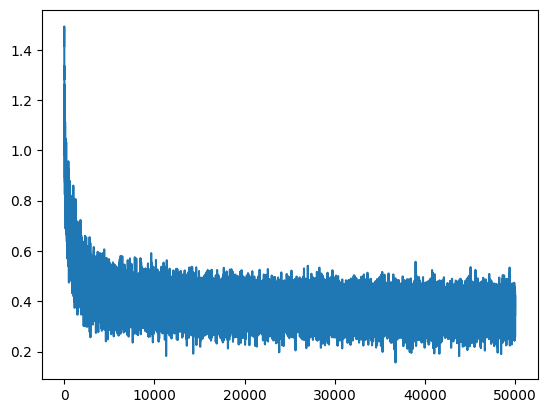

In [320]:
plt.plot(stepi, lossi)

In [321]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3391, device='cuda:0', grad_fn=<NllLossBackward0>)

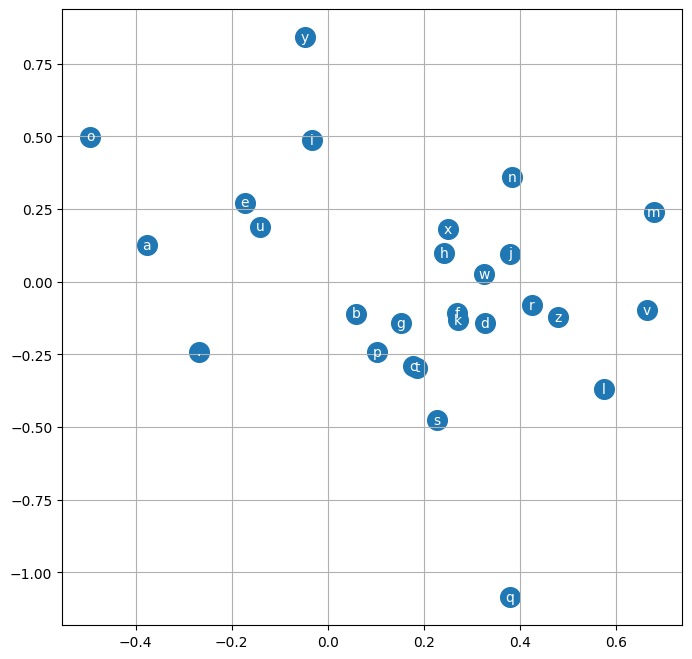

In [312]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].cpu().data, C[:,1].cpu().data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [311]:
C[:,0].cpu()

tensor([-0.2689, -0.3768,  0.0592,  0.1782,  0.3280, -0.1729,  0.2693,  0.1521,
         0.2415, -0.0324,  0.3803,  0.2713,  0.5754,  0.6794,  0.3845, -0.4943,
         0.1031,  0.3787,  0.4255,  0.2272,  0.1866, -0.1404,  0.6653,  0.3262,
         0.2501, -0.0479,  0.4802], grad_fn=<ToCopyBackward0>)

In [324]:
g = torch.Generator(device=device).manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

bakinsleyzen.
keiryn.
jann.
rer.
cash.
eidenoruwah.
emanch.
grondgenel.
tahmineth.
arelioh.
aabshtynn.
candeendyn.
dazhiann.
carlena.
gargh.
kareigh.
kabkaviah.
adesterick.
anje.
cazer.
